Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 4th Semester                                           
Batch: I-3            
                                                                       Date: 18/2/2022       
Subject: ML
###Experiment-9

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("Naive_Bayes.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#converting categorical into numerical values
df['Sex_Numeric']=np.where(df['Sex']=='male',0,1)
df['Embarked_Numeric']=np.where(df['Embarked']=='S',0,np.where(df['Embarked']=='C',1,2))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric,Embarked_Numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:
data=df[['Survived','Pclass','Sex_Numeric','Age','SibSp','Parch','Fare','Embarked_Numeric']]

In [ ]:
data.head()

,Survived,Pclass,Sex_Numeric,Age,SibSp,Parch,Fare,Embarked_Numeric
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
data=data.dropna(axis=0,how='any')

In [ ]:
data.shape

(714, 8)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
x=data[['Pclass','Sex_Numeric','Age','SibSp','Parch','Fare','Embarked_Numeric']]
y=data['Survived']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0,shuffle=True)

In [ ]:
xtrain.shape

(499, 7)

In [ ]:
xtest.shape

(215, 7)

In [ ]:
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
accuracy = metrics.accuracy_score(ytest,y_pred)
accuracy

0.7906976744186046

In [ ]:
#to plot confusion mat
con_mat = pd.crosstab(ytest,y_pred,rownames=['Actual'],colnames=['Predicted'])

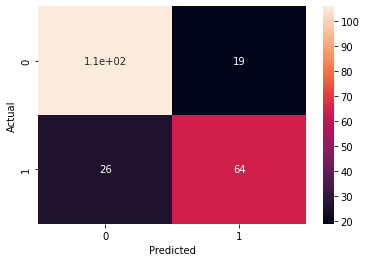

In [ ]:
sns.heatmap(con_mat,annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_pred)

array([[106,  19],
       [ 26,  64]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(ytest,y_pred)

0.7710843373493976

In [ ]:
recall_score(ytest,y_pred)

0.7111111111111111

In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred)

0.7398843930635839

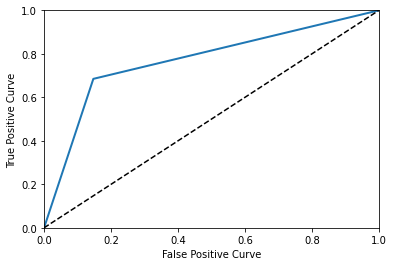

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(model,xtrain,ytrain,cv=3,method='predict')


from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(ytrain,y_scores)

def plot_roc(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Curve')
  plt.ylabel('True Positive Curve')
                         
plot_roc(fpr,tpr)                         

#Conclusion:
1) Implemented Gaussian Naive Bayes model on Titanic dataset.   
2) Inorder to use the given data we converted some classes of data into numeric form from their alphabetical form.         
3) Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.   
4) Splitting the dataset into a ratio of 70:30 for train:test gives the most accurate model.       
5) Using more sklearn metrics like heatmap,ROC curve etc helps us to get a clear insight into more parameters like false positives, true negatives etc.

In [ ]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_ML_Prac9.ipynb

[NbConvertApp] Converting notebook I082_Shreyas_Dongre_ML_Prac9.ipynb to html
[NbConvertApp] Writing 340551 bytes to I082_Shreyas_Dongre_ML_Prac9.html
